## Cluster confusion matrix

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
K = 7

cx_name = ['None', 'interstitial lung disease', 'Renal compromise', 'Malignancy of lung', 'PAH', 'Lymphoma', 'Thrombocytopenia']
group_name = [str(i) for i in range(K)]

In [62]:
cluster = np.array([
    [24950.0, 5450.0, 1255.0, 17051.0, 10786.0, 443.0, 11492.0],
    [565.0, 173.0, 23.0, 400.0, 242.0, 9.0, 326.0],
    [2136.0, 522.0, 90.0, 1427.0, 869.0, 45.0, 907.0],
    [143.0, 25.0, 7.0, 73.0, 45.0, 2.0, 55.0],
    [138.0, 23.0, 6.0, 63.0, 46.0, 0.0, 62.0],
    [108.0, 32.0, 10.0, 86.0, 49.0, 1.0, 52.0],
    [510.0, 150.0, 34.0, 381.0, 231.0, 13.0, 245.0]
]).astype(float)

print(np.sum(cluster, axis=1))

cluster_by_group = cluster / cluster.sum(axis=1, keepdims=True)
cluster_by_cx = cluster / cluster.sum(axis=0, keepdims=True)

cluster_by_group

[71427.  1738.  5996.   350.   338.   338.  1564.]


array([[0.34930768, 0.07630168, 0.01757039, 0.23871925, 0.15100732,
        0.00620214, 0.16089154],
       [0.32508631, 0.0995397 , 0.0132336 , 0.2301496 , 0.13924051,
        0.00517837, 0.18757192],
       [0.35623749, 0.08705804, 0.01501001, 0.23799199, 0.14492995,
        0.007505  , 0.15126751],
       [0.40857143, 0.07142857, 0.02      , 0.20857143, 0.12857143,
        0.00571429, 0.15714286],
       [0.40828402, 0.06804734, 0.01775148, 0.18639053, 0.13609467,
        0.        , 0.18343195],
       [0.31952663, 0.09467456, 0.0295858 , 0.25443787, 0.14497041,
        0.00295858, 0.15384615],
       [0.32608696, 0.09590793, 0.02173913, 0.24360614, 0.14769821,
        0.00831202, 0.15664962]])

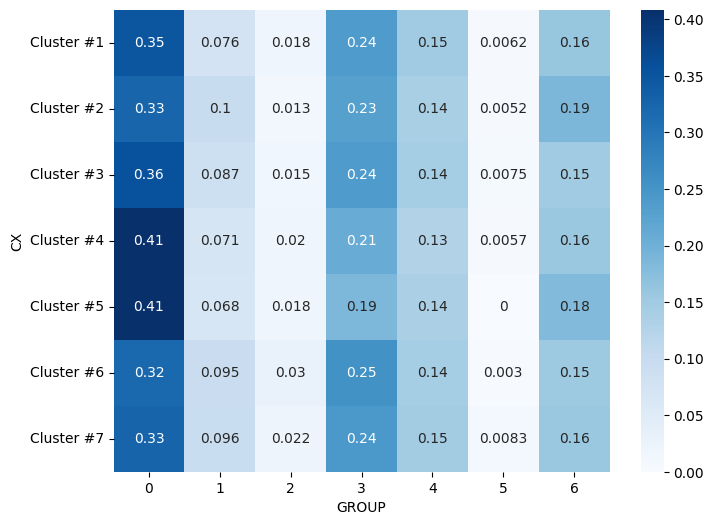

In [63]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cluster_by_group, annot=True, cmap='Blues', cbar=True, xticklabels=group_name, yticklabels=cx_name)

ax.set_xlabel('GROUP')
ax.set_ylabel('CX')

plt.show()

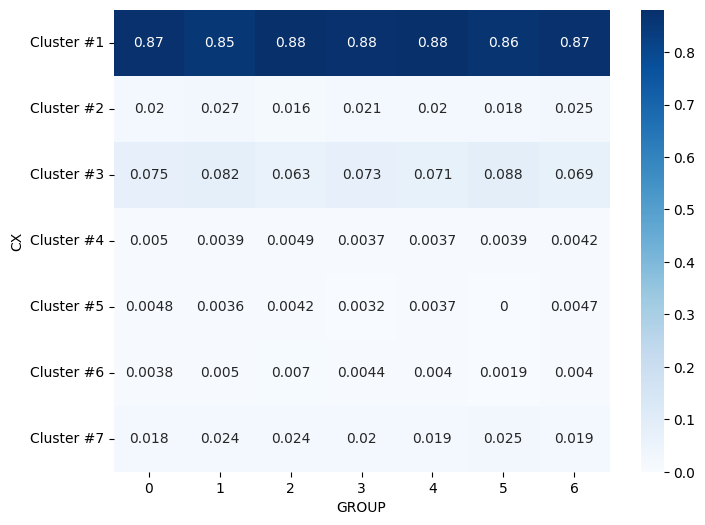

In [64]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cluster_by_cx, annot=True, cmap='Blues', cbar=True, xticklabels=group_name, yticklabels=cx_name)

ax.set_xlabel('GROUP')
ax.set_ylabel('CX')

plt.show()

## Interactive TSNE trajectory plot

In [15]:
from sklearn.manifold import TSNE

In [23]:
x_corpus = np.load('../temp_model/data/x_corpus.npz')['arr_0']
idcode = np.load('../temp_model/data/idcode.npz')['arr_0']
label = np.load('../temp_model/data/cluster.npz')['arr_0']

In [45]:
idcode[-1]

4011.0

In [57]:
IDCODE = 2202
label[idcode == IDCODE]

array([3., 0., 4., 4., 4., 4., 2., 3., 3., 0., 0., 0., 0.])

Text(0, 0.5, 't-SNE component 2')

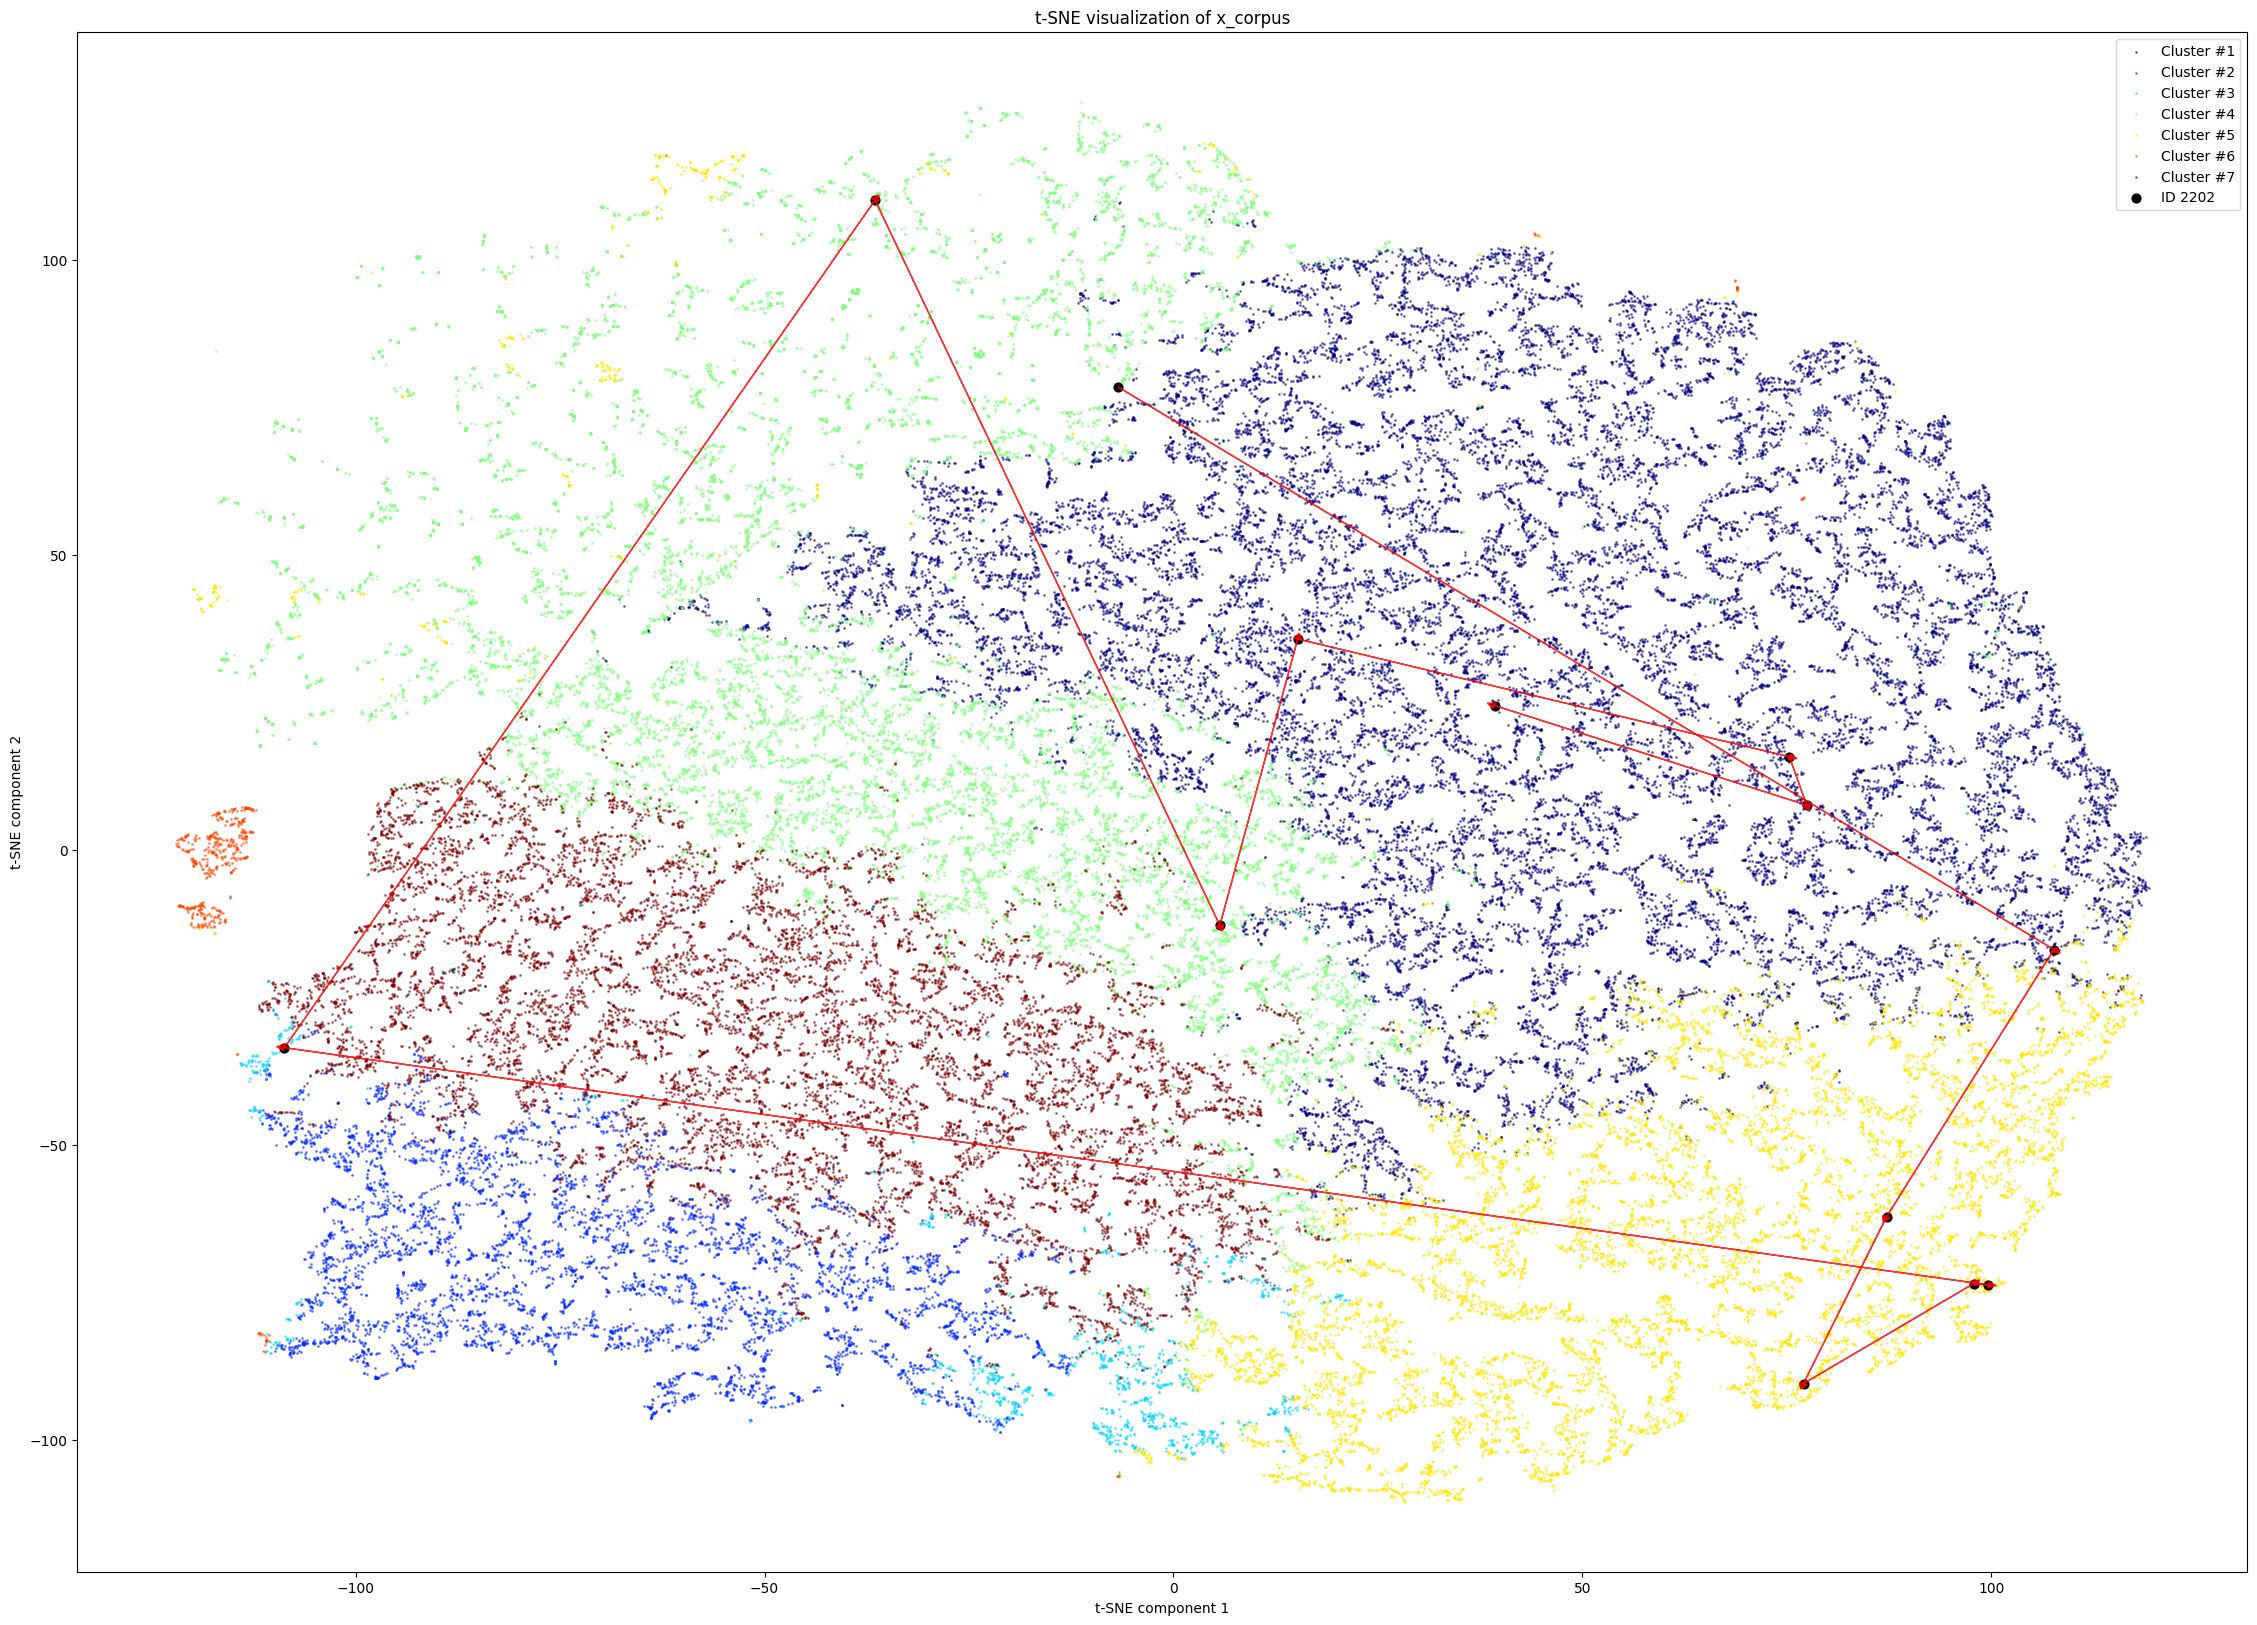

In [58]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_corpus)

plt.figure(figsize=(28, 20))

cx_name = [f"Cluster #{i}" for i in range(1, 8)]

unique_labels = np.unique(label)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for i, unique_label in enumerate(unique_labels):
    plt.scatter(x_tsne[label == unique_label, 0], x_tsne[label == unique_label, 1], 
                color=colors[i], label=f'{cx_name[i]}', alpha=0.5, s=1)
    
highlight_points = x_tsne[idcode == IDCODE]
plt.scatter(highlight_points[:, 0], highlight_points[:, 1], color='black', label=f'ID {IDCODE}', alpha=1, s=40)

highlight_indices = np.where(idcode == IDCODE)[0]
for i in range(len(highlight_indices) - 1):
    start_idx = highlight_indices[i]
    end_idx = highlight_indices[i + 1]
    plt.arrow(x_tsne[start_idx, 0], x_tsne[start_idx, 1], 
              x_tsne[end_idx, 0] - x_tsne[start_idx, 0], 
              x_tsne[end_idx, 1] - x_tsne[start_idx, 1], 
              color='red', alpha=0.8, head_width=1, head_length=1)

plt.legend()
plt.title('t-SNE visualization of x_corpus')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')